In [1]:
!nvidia-smi -L


GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-2889cd87-c6fa-c58a-0ac2-214baf623d34)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-23 04:44:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-23 04:44:50 (87.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [4]:
# text data set 
#classification binary 
!wget https://github.com/Balagopal-datascientist/nlp_tensorflow/blob/master/nlp_getting_started.zip?raw=true

--2021-08-23 04:44:52--  https://github.com/Balagopal-datascientist/nlp_tensorflow/blob/master/nlp_getting_started.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Balagopal-datascientist/nlp_tensorflow/raw/master/nlp_getting_started.zip [following]
--2021-08-23 04:44:53--  https://github.com/Balagopal-datascientist/nlp_tensorflow/raw/master/nlp_getting_started.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Balagopal-datascientist/nlp_tensorflow/master/nlp_getting_started.zip [following]
--2021-08-23 04:44:53--  https://raw.githubusercontent.com/Balagopal-datascientist/nlp_tensorflow/master/nlp_getting_started.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133,

In [5]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"


--2021-08-23 04:44:53--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-08-23 04:44:53 (96.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
unzip_data("nlp_getting_started.zip")

In [7]:
#visualizing the data
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [10]:
train_df_shuffeled = train_df.sample(frac=1,random_state=42)
train_df_shuffeled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [11]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
#visualize random training samples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffeled[['text','target']][random_index:random_index+5].itertuples():
  _,text,target = row

  print(f"target:{target}", "(real_disaster)" if target > 0 else "(not a disater)")
  print(f'text:\n {text}')

target:0 (not a disater)
text:
 Man crush everyday ????  @CristianInspire http://t.co/iXjQG1sx6u
target:1 (real_disaster)
text:
 @PTSD_Chat Yes. I feel the root of that is Shame - which can be found in the rubble of most trauma. #PTSDchat
target:0 (not a disater)
text:
 @AutoAmes everyone hoped we would join ISIS and get ventilated by marines while trying to detonate a bandolier of hot dogs at Fort Dix
target:1 (real_disaster)
text:
 .POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/8owC41FMBR
target:0 (not a disater)
text:
 Stream HYPE HURRICANE


In [13]:
#SPLIT DATA INTO TRAING AND VALIDATION 
from sklearn.model_selection import train_test_split
train_sentences,val_sentences , train_labels , val_labels = train_test_split(train_df_shuffeled['text'].to_numpy(),train_df_shuffeled["target"].to_numpy(),
                                                                             test_size=0.1,
                                                                             random_state=42) 

In [14]:
len(train_sentences), len(val_sentences) ,len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

#TEXT TO NUMBERS tokanization = text vectorization



In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = None,
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams= None,
                                    output_mode="int",
                                    output_sequence_length= None,
                                    pad_to_max_tokens = False)

In [16]:
max_vocab_length = 10000
max_length = 15
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens = True)

In [17]:
#fit texrt vectroizer 
text_vectorizer.adapt(train_sentences)

In [18]:
sample_sentances = "there is a flood in chennai city"
text_vectorizer([sample_sentances])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,   1, 182,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
random_sentence = random.choice(train_sentences)
text_vectorizer(random_sentence),random_sentence

(<tf.Tensor: shape=(15,), dtype=int64, numpy=
 array([ 343,  824,   18,    1, 2694,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0])>,
 'Photo: blue by @forest.fires source: http://t.co/awXR24zsqh http://t.co/o9A26Fn27y')

In [20]:
#get unique words
words_in_vocab = text_vectorizer.get_vocabulary()

In [21]:
words_in_vocab,len(words_in_vocab)

(['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with',
  'it',
  'that',
  'at',
  'by',
  'this',
  'from',
  'be',
  'are',
  'was',
  'have',
  'like',
  'as',
  'up',
  'so',
  'just',
  'but',
  'me',
  'im',
  'your',
  'not',
  'amp',
  'out',
  'its',
  'will',
  'an',
  'no',
  'has',
  'fire',
  'after',
  'all',
  'when',
  'we',
  'if',
  'now',
  'via',
  'new',
  'more',
  'get',
  'or',
  'about',
  'what',
  'he',
  'people',
  'news',
  'been',
  'over',
  'one',
  'how',
  'dont',
  'they',
  'who',
  'into',
  'were',
  'do',
  'us',
  '2',
  'can',
  'video',
  'emergency',
  'there',
  'disaster',
  'than',
  'police',
  'would',
  'his',
  'still',
  'her',
  'some',
  'body',
  'storm',
  'crash',
  'burning',
  'suicide',
  'back',
  'man',
  'california',
  'why',
  'time',
  'them',
  'had',
  'buildings',
  'rt',
  'first',
  'cant',
  'see',
  'got',
  'day',
  'off',
  'our',
  'going',
 

###creating embending embeding layer 

In [22]:
from tensorflow.keras import layers 
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim = 128,
                             input_length=max_length)

In [23]:
sample_embed = embedding(text_vectorizer([random_sentence]))

In [24]:
sample_embed[0][0], sample_embed[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.03616032, -0.02632405,  0.00967033,  0.00484826, -0.02442225,
         0.03691151,  0.01920127, -0.01563357, -0.01422074, -0.00635307,
         0.01862598, -0.01561526,  0.0113785 , -0.0459712 ,  0.00604528,
        -0.01774093,  0.02982352,  0.03515689,  0.03070723, -0.01533607,
         0.01918806,  0.03195539,  0.01028289,  0.03788494,  0.02687565,
        -0.02725716,  0.0355399 , -0.04050059,  0.04682148, -0.00714476,
        -0.0342518 , -0.02657976,  0.00599123,  0.02856893, -0.03337028,
        -0.03476478,  0.00735408,  0.04789883,  0.02390124,  0.03939778,
        -0.02003816,  0.02997656,  0.04858569, -0.00925753,  0.00587793,
         0.0231928 ,  0.04224929,  0.01421091,  0.00527308,  0.01806736,
        -0.00134567,  0.00561397,  0.01800671, -0.04110413, -0.04193689,
         0.0270477 , -0.00240333,  0.03194345, -0.01905279,  0.0430945 ,
         0.0309178 , -0.01348506,  0.00187178,  0.03618651,  0.01277847,
  

In [25]:
#MODEL BASELINE 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),
                    ("clf", MultinomialNB())
])
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
#evaluate
baseline_score = model_0.score(val_sentences,val_labels)
baseline_score*100

79.26509186351706

In [27]:
baseline_preds = model_0.predict(val_sentences)

In [28]:
#FUNCTION
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_result(y_true,y_pred):
  model_accuracy = accuracy_score(y_true,y_pred)

  model_precision , model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average = "weighted")

  model_results = {"accuracy" : model_accuracy,
                   "precision" : model_precision,
                   "recall" : model_recall,
                   "f1" : model_f1
  }
  return model_results


In [29]:
baseline_results = calculate_result(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [30]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [31]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs,name = "model_1_dense")

In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )

In [34]:
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name="dense model 1")] )

Saving TensorBoard log files to: model_logs/dense model 1/20210823-044458
Epoch 1/5
215/215 [==============================] - 4s 7ms/step - loss: 0.6136 - accuracy: 0.6925 - val_loss: 0.5388 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4433 - accuracy: 0.8174 - val_loss: 0.4699 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3481 - accuracy: 0.8619 - val_loss: 0.4585 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2861 - accuracy: 0.8897 - val_loss: 0.4600 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2388 - accuracy: 0.9124 - val_loss: 0.4787 - val_accuracy: 0.7808


In [35]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))

In [36]:
model_1_results = calculate_result(y_true = val_labels,
                                   y_pred = model_1_pred)

In [37]:
model_1_results

{'accuracy': 0.7808398950131233,
 'f1': 0.7779792730264676,
 'precision': 0.7848699684611963,
 'recall': 0.7808398950131233}

In [38]:
baseline_results

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [39]:
!tensorboard dev upload --logdir ./model_logs

2021-08-23 04:45:10.068803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-23 04:45:10.084872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-23 04:45:10.085804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Pol

In [44]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 0.79, New accuracy: 0.78, Difference: -0.01
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


In [45]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab ),words_in_vocab[:10]
 

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [46]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) 

(10000, 128)


In [47]:
  import io

# # Create output writers
  out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
  out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
  for num, word in enumerate(words_in_vocab):
    if num == 0: 
       continue # skip padding token
    vec = embed_weights[num]
    out_m.write(word + "\n") # write words to file
    out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
  out_v.close()
  out_m.close()

# # Download files locally to upload to Embedding Projector
  try:
    from google.colab import files
  except ImportError:
    pass
  else:
    files.download("embedding_vectors.tsv")
    files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

rnn model2 

In [48]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)#you can only stack lstm layers if sequenses is true
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64,activation="relu")(x)#optional
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [49]:
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [50]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20210823-044545
Epoch 1/5
215/215 [==============================] - 8s 15ms/step - loss: 0.2193 - accuracy: 0.9238 - val_loss: 0.5610 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1584 - accuracy: 0.9410 - val_loss: 0.6386 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1285 - accuracy: 0.9534 - val_loss: 0.7588 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1035 - accuracy: 0.9588 - val_loss: 0.9153 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0858 - accuracy: 0.9676 - val_loss: 1.1230 - val_accuracy: 0.7730


In [52]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

((762, 1), array([[1.1164268e-03],
        [3.3460807e-02],
        [9.9999523e-01],
        [5.5272546e-02],
        [1.5950060e-04],
        [9.9997842e-01],
        [9.8935610e-01],
        [9.9999666e-01],
        [9.9999416e-01],
        [5.2406055e-01]], dtype=float32))

In [53]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [54]:
model_2_results = calculate_result(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 0.7729658792650919,
 'f1': 0.7704381702262061,
 'precision': 0.775649278370019,
 'recall': 0.7729658792650919}

In [55]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 0.79, New accuracy: 0.77, Difference: -0.02
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [56]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x= embedding(x)
x = layers.GRU(64,return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs , outputs , name = "model_3_Gru")

In [57]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [58]:

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20210823-044602
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.1498 - accuracy: 0.9482 - val_loss: 0.7743 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0862 - accuracy: 0.9683 - val_loss: 1.0125 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0701 - accuracy: 0.9724 - val_loss: 1.5062 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0577 - accuracy: 0.9743 - val_loss: 1.2246 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0494 - accuracy: 0.9771 - val_loss: 1.1625 - val_accuracy: 0.7598


In [59]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [60]:
model_3_results = calculate_result(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 0.7598425196850394,
 'f1': 0.7595606050018504,
 'precision': 0.7594918880291538,
 'recall': 0.7598425196850394}

In [61]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.03
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


In [62]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs, name = "model_4_bidiirectional")

In [63]:
model_4.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [64]:
model_4.summary()

Model: "model_4_bidiirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
__________________________________

In [65]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20210823-044618
Epoch 1/5
215/215 [==============================] - 11s 23ms/step - loss: 0.0975 - accuracy: 0.9683 - val_loss: 1.2710 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0521 - accuracy: 0.9758 - val_loss: 1.5968 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0485 - accuracy: 0.9781 - val_loss: 1.3621 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0437 - accuracy: 0.9793 - val_loss: 1.1317 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0397 - accuracy: 0.9793 - val_loss: 1.4140 - val_accuracy: 0.7598


In [66]:
model_4_pred_probs = model_4.predict(val_sentences)

model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [67]:
model_4_results = calculate_result(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.7598425196850394,
 'f1': 0.7578634561555269,
 'precision': 0.760844531051619,
 'recall': 0.7598425196850394}

In [68]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.03
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


In [69]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5,
                  activation = "relu")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation = "sigmoid")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs, name="model_5_Conv1d")

In [70]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
model_5.summary()

Model: "model_5_Conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 32)            20512     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)              

In [72]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210823-044641
Epoch 1/5
215/215 [==============================] - 15s 9ms/step - loss: 0.2238 - accuracy: 0.9059 - val_loss: 0.6973 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1011 - accuracy: 0.9584 - val_loss: 0.8023 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0745 - accuracy: 0.9715 - val_loss: 0.8996 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0636 - accuracy: 0.9729 - val_loss: 0.9592 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0544 - accuracy: 0.9780 - val_loss: 1.0410 - val_accuracy: 0.7454


In [73]:
model_5_pred_probs = model_5.predict(val_sentences)

model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

model_5_results = calculate_result(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 0.7454068241469817,
 'f1': 0.7454633466334166,
 'precision': 0.7455301582447825,
 'recall': 0.7454068241469817}

In [74]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 0.79, New accuracy: 0.75, Difference: -0.05
Baseline precision: 0.81, New precision: 0.75, Difference: -0.07
Baseline recall: 0.79, New recall: 0.75, Difference: -0.05
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


In [75]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embed_samples = embed([sample_sentances,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

In [76]:
print(embed_samples)

tf.Tensor(
[[-0.02275864  0.01666306 -0.00906122 ...  0.00038421 -0.00952992
  -0.08151128]
 [ 0.03596684 -0.08579468 -0.01152742 ... -0.03414335  0.02816026
  -0.00878943]], shape=(2, 512), dtype=float32)


In [77]:
embed_samples[0].shape

TensorShape([512])

In [78]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [79]:
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [80]:
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [81]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210823-044723
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.5035 - accuracy: 0.7796 - val_loss: 0.4513 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4134 - accuracy: 0.8161 - val_loss: 0.4472 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3999 - accuracy: 0.8209 - val_loss: 0.4327 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3921 - accuracy: 0.8275 - val_loss: 0.4286 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3856 - accuracy: 0.8295 - val_loss: 0.4263 - val_accuracy: 0.8110


In [82]:
model_6_pred_probs = model_6.predict(val_sentences)

model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

model_6_results = calculate_result(val_labels, model_6_preds)
model_6_results



{'accuracy': 0.8110236220472441,
 'f1': 0.8098067287043664,
 'precision': 0.8122955784373107,
 'recall': 0.8110236220472441}

In [83]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 0.79, New accuracy: 0.81, Difference: 0.02
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


In [86]:
import numpy as np
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [87]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [88]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [89]:
model_7 = tf.keras.models.clone_model(model_6)


In [91]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [92]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [93]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20210823-050459
Epoch 1/5
22/22 [==============================] - 5s 128ms/step - loss: 0.6720 - accuracy: 0.6837 - val_loss: 0.6494 - val_accuracy: 0.7021
Epoch 2/5
22/22 [==============================] - 0s 21ms/step - loss: 0.6031 - accuracy: 0.8017 - val_loss: 0.5986 - val_accuracy: 0.7323
Epoch 3/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5252 - accuracy: 0.8178 - val_loss: 0.5389 - val_accuracy: 0.7664
Epoch 4/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4593 - accuracy: 0.8280 - val_loss: 0.5066 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4129 - accuracy: 0.8426 - val_loss: 0.4906 - val_accuracy: 0.7730


In [94]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.2546521 ],
       [0.75926137],
       [0.8912571 ],
       [0.28926343],
       [0.56392986],
       [0.82952046],
       [0.82387936],
       [0.8520071 ],
       [0.801587  ],
       [0.13395488]], dtype=float32)

In [95]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [96]:
model_7_results = calculate_result(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7729658792650919,
 'f1': 0.7695350827050221,
 'precision': 0.777881100544101,
 'recall': 0.7729658792650919}

In [97]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 0.79, New accuracy: 0.77, Difference: -0.02
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [103]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results


,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.780840,0.784870,0.780840,0.777979
lstm,0.772966,0.775649,0.772966,0.770438
gru,0.759843,0.759492,0.759843,0.759561
bidirectional,0.759843,0.760845,0.759843,0.757863
conv1d,0.745407,0.745530,0.745407,0.745463
tf_hub_sentence_encoder,0.811024,0.812296,0.811024,0.809807
tf_hub_10_percent_data,0.772966,0.777881,0.772966,0.769535


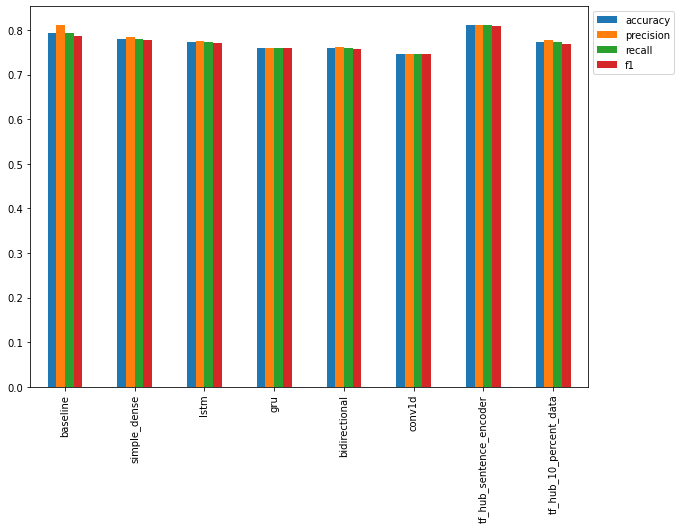

In [105]:
all_model_results.plot(kind="bar",
                       figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

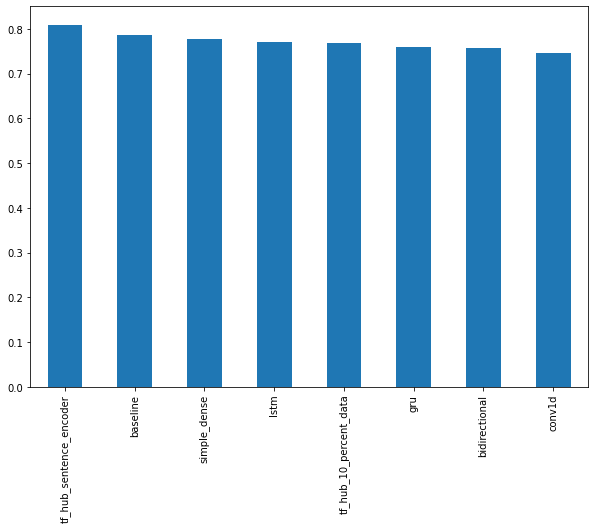

In [106]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

saving and loading a trained model

In [107]:
model_6.save("model_6.h5")

In [109]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [110]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4263 - accuracy: 0.8110


[0.4262796640396118, 0.8110235929489136]

In [111]:
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [113]:
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [114]:
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4263 - accuracy: 0.8110


[0.4262796640396118, 0.8110235929489136]

In [116]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})

In [117]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)

In [118]:
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9120919108390808
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8933807015419006
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8812574148178101
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8351919054985046
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8349548578262329
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8240978121757507
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.818841993

In [120]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.15687254071235657
Text:
A snowstorm is brewing over my desk &amp; hands are NUMB.. @irishirr - I'm guessing you adjusted thermostat? :/ @WSAZ_Brittany @kellyannwx #WSAZ

----

Pred: 0, Prob: 0.4868869185447693
Text:
Abe proposed a new plan for abolishing nuclear weapons. Yesterday his defense minister made clear nukes are fine. http://t.co/A6IR8rKuwS

----

Pred: 1, Prob: 0.692986786365509
Text:
Bay Whale Worries Rescuers http://t.co/nfKTvVLWHm

----

Pred: 0, Prob: 0.14026933908462524
Text:
@misschaela_ not yet.  Everywhere else except us and like a few other shops like Panda are evacuated but they haven't come for us yet.

----

Pred: 1, Prob: 0.6751083135604858
Text:
@gracemccreave_ @jamisonevann @jace_swain @_laneyslife @JacksonLaurie1 lava boy was taken

----

Pred: 1, Prob: 0.5680162906646729
Text:
Uttarakhand: Journalist's house demolished who exposed corruption - Oneindia http://t.co/Ro1aWWuDYE

----

Pred: 0, Prob: 0.0975269004702568
Text:
If you bored as shit

In [121]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [122]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.24308698899949377, 0.00031901179658726215)

In [123]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.016988100999697053, 2.2294095800127366e-05)

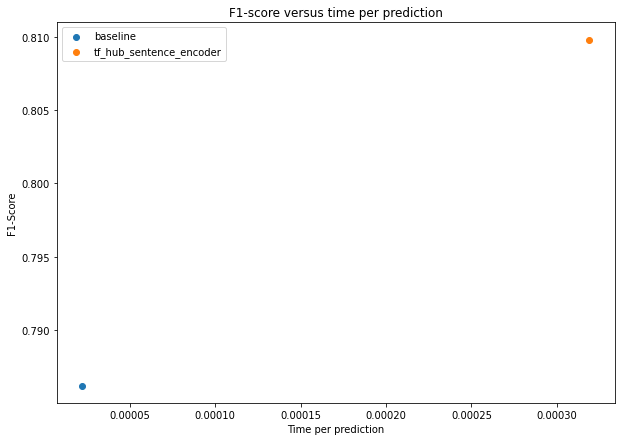

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");